<a href="https://colab.research.google.com/github/celina-velazquez/ADS-504/blob/main/assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This section of code imports the libraries required for this script.

<IPython.core.display.Javascript object>

Saved to photo.jpg


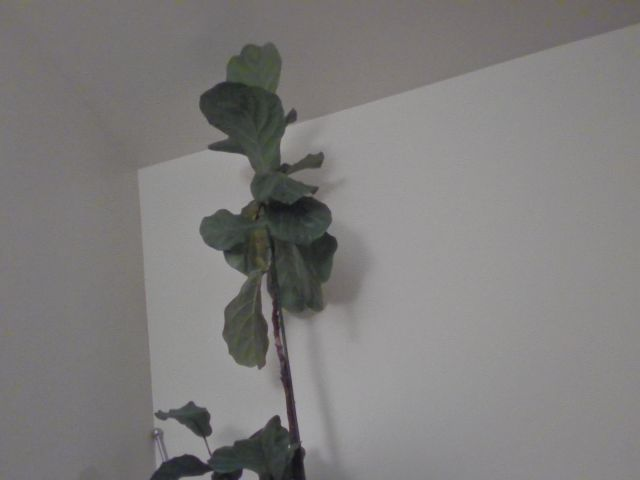

In [3]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8): # This section gives access to the web camera and saves the file as photo.jpg.
  js = Javascript(''' // this creates a variable from a javascript function. The three apostrophes denote that there will be more than one line.
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button'); // Creates a button and assigns it to the capture variable.
      capture.textContent = 'Capture'; // This adds text to the button.
      div.appendChild(capture); // This makes the button visible.

      const video = document.createElement('video'); // Creates a video element.
      video.style.display = 'block'; // This creates a block of the video element.

      const stream = await navigator.mediaDevices.getUserMedia({video: true}); // This asks the user for permission to turn on the video camera.

// This section adds the video to the video element and displays the video element in a container and plays the video.
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // This resizes the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // This waits for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

This section of code imports the libraries required to run this section of code.

--2025-08-03 04:32:31--  https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28104 (27K) [text/plain]
Saving to: ‘deploy.prototxt’

deploy.prototxt     100%[===================>]  27.45K  --.-KB/s    in 0.01s   

Last-modified header missing -- time-stamps turned off.
2025-08-03 04:32:31 (2.25 MB/s) - ‘deploy.prototxt’ saved [28104/28104]

--2025-08-03 04:32:31--  https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubus

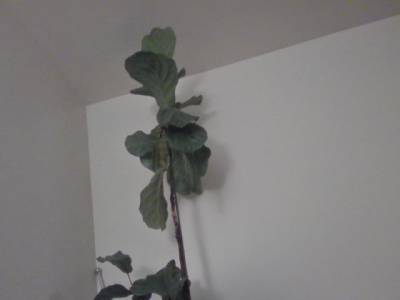

In [6]:
import cv2
import numpy as np
import imutils
from google.colab.patches import cv2_imshow

!wget -N https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
!wget -N https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

print("[INFO] loading model...")
prototxt = 'deploy.prototxt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt, model)

image = cv2.imread("photo.jpg")
(h, w) = image.shape[:2]
# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

for i in range(0, detections.shape[2]):
    # extract the confidence (i.e., probability) associated with the prediction
    confidence = detections[0, 0, i, 2]
    # filter out weak detections by ensuring the `confidence` is
    # greater than the minimum confidence threshold
    if confidence > 0.5:
        # compute the (x, y)-coordinates of the bounding box for the object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        # draw the bounding box of the face along with the associated probability
        text = "{:.2f}%".format(confidence * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
        cv2.putText(image, text, (startX, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

cv2_imshow(image)